In [1]:
!pip install tensorflow matplotlib seaborn -q


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['figure.figsize'] = (10, 6)

print(tf.__version__)

tf.random.set_seed(31)

2023-05-15 16:09:56.196128: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


/var/folders/sz/88ypmmqn0jq157npq4hmjtkh0000gp/T/ipykernel_44178/964476487.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
hours= np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,
                 2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
failpass=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

In [4]:
b0 = tf.Variable(0.0)
b1 = tf.Variable(0.0)

In [5]:
def logistic_model(X):
    return tf.sigmoid(tf.add(tf.multiply(X, b1), b0))

def loss(Y, Y_pred):
    return -tf.reduce_sum(Y*tf.math.log(Y_pred))-tf.reduce_sum((1.0-Y)*tf.math.log(1.0-Y_pred))

In [6]:
# learning rate
lr = 1e-3

# gradient descent optimizer
optimizer = tf.optimizers.SGD(lr)


In [7]:
epochs = range(5000)
for epoch in epochs:

    with tf.GradientTape() as tape:
        prediction = logistic_model(hours)
        current_loss = loss(failpass,prediction)
        
    gradients = tape.gradient(current_loss, [b0, b1])
    optimizer.apply_gradients(zip(gradients, [b0 ,b1]))

In [8]:
print("slope =", b1.numpy(), "intercept =", b0.numpy())

slope = 1.3286266 intercept = -3.5550344


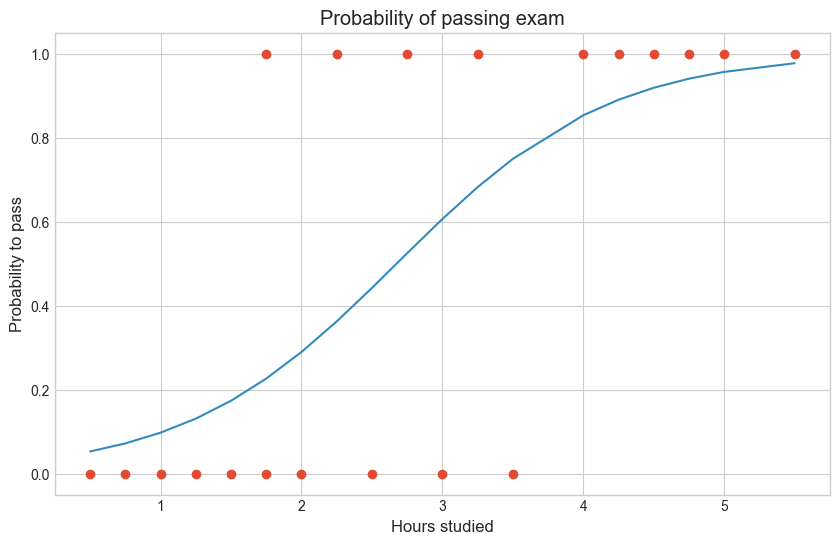

In [9]:
plt.figure()
plt.plot(hours,failpass, 'o', label ='Original data') 
plt.plot(hours, prediction, label ='Fitted line')

plt.title('Probability of passing exam')
plt.xlabel('Hours studied')
plt.ylabel('Probability to pass')
plt.show()